### This is a demo for artpop for showing a color magnitude diagram of a composite stellar population with magnitude in I band versus V-I as axes.

In [1]:
# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u   

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

# setup for ages, photometric system, and etc.
imf = 'kroupa'  # initial mass function
phot_system = 'UBVRIplus'
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3]

I made a composite stellar population consists of three types of stars: old, intermediate, and young, each with different age and population. Distance is only 10 pc, as default. Here the same setup from the tutorial is used for demo purpose.

In [2]:
ssp_old = artpop.MISTSSP(
    log_age = 10.1,       # log of age in years
    feh = -1.5,           # metallicity [Fe/H]
    phot_system = phot_system, # photometric system(s)
    num_stars = 5e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_intermediate = artpop.MISTSSP(
    log_age = 9.5,        # log of age in years
    feh = -1,             # metallicity [Fe/H]
    phot_system = phot_system, # photometric system(s)
    num_stars = 1e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_young = artpop.MISTSSP(
    log_age = 8.5,        # log of age in years
    feh = 0,              # metallicity [Fe/H]
    phot_system = phot_system, # photometric system(s)
    num_stars = 1e4,      # number of stars
    random_state = rng,   # random state for reproducibility
)

csp = ssp_old + ssp_intermediate + ssp_young
print(type(csp))

<class 'artpop.stars.populations.CompositePopulation'>


Now, we plot the color magnitude diagram for this pop, second one with labels in ages.

In [3]:
I = csp.star_mags('Bessell_I')
V = csp.star_mags('Bessell_V')
H = csp.star_mags('2MASS_H')
J = csp.star_mags('2MASS_J')

# generating age mask for pop
old = csp.ssp_labels == 1
med = csp.ssp_labels == 2
young = csp.ssp_labels == 3

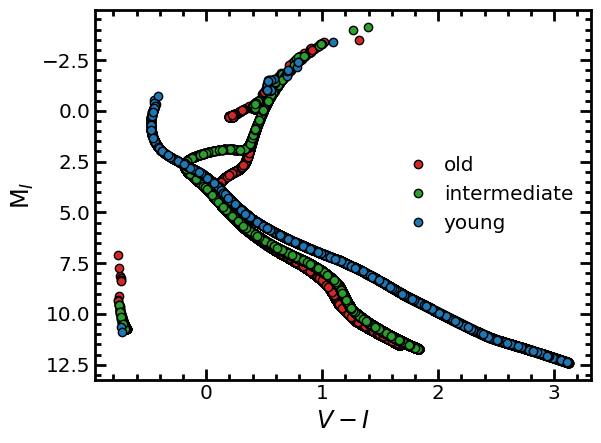

In [4]:
# plot V-I - I

plt.plot(V[old] - I[old], I[old], 'o', 
         c='tab:red', mec='k', label='old')
plt.plot(V[med] - I[med], I[med], 'o', 
         c='tab:green', mec='k', label='intermediate')
plt.plot(V[young] - I[young], I[young], 'o', 
         c='tab:blue', mec='k', label='young')

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_I$');

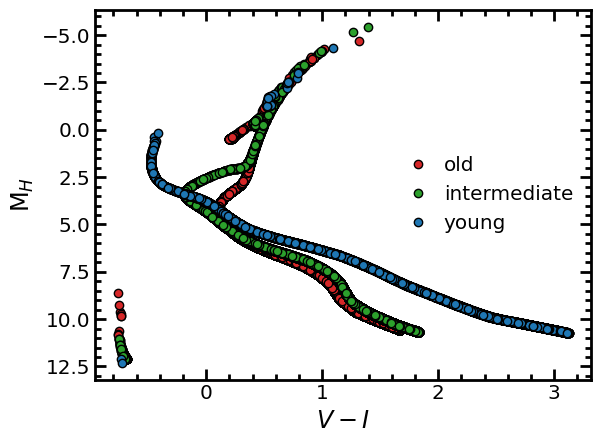

In [5]:
# plot V-I - H

plt.plot(V[old] - I[old], H[old], 'o', 
         c='tab:red', mec='k', label='old')
plt.plot(V[med] - I[med], H[med], 'o', 
         c='tab:green', mec='k', label='intermediate')
plt.plot(V[young] - I[young], H[young], 'o', 
         c='tab:blue', mec='k', label='young')

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_H$');

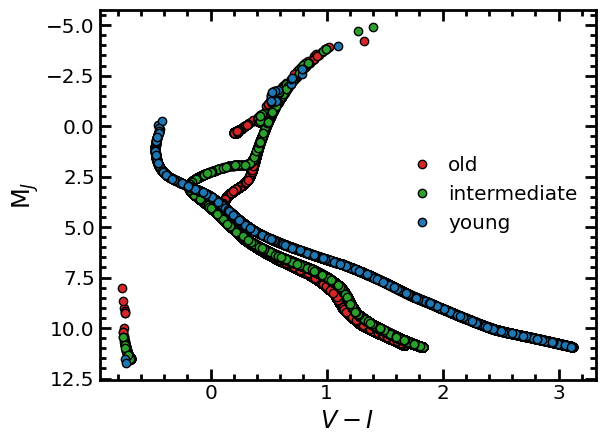

In [6]:
# plot V-I - H
plt.plot(V[old] - I[old], J[old], 'o', 
         c='tab:red', mec='k', label='old')
plt.plot(V[med] - I[med], J[med], 'o', 
         c='tab:green', mec='k', label='intermediate')
plt.plot(V[young] - I[young], J[young], 'o', 
         c='tab:blue', mec='k', label='young')

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_J$');

We then try the other photometric system with v and i bands. Now, we use loops to sample pop ages and metallicity, using examples from python script of the paper.

In [7]:
###############################################################################
# Calculate SSP mass, mags using ArtPop (takes ~6 minutes)
###############################################################################

# Setting up the environment for running artpop
imf = 'kroupa'
phot_system = 'UBVRIplus'
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3] # _log_age_grid = np.arange(5.0, 10.3, 0.05), here we discarded marginal ages

# SSP mass
mass = {}

# SSP magnitudes
V = {}
I = {}
H = {}
J = {}

for feh in [-1.5, 0.0]:  # sampling with various metallicity
    print(f'[Fe/H] = {feh}')

    mass[feh] = []

    V[feh] = []
    I[feh] = []
    H[feh] = []
    J[feh] = []

    for log_age in log_ages:

        mist = artpop.MISTIsochrone(log_age, feh, phot_system)

        mass[feh].append(mist.ssp_surviving_mass('kroupa'))

        V[feh].append(mist.ssp_mag('Bessell_V', imf))
        I[feh].append(mist.ssp_mag('Bessell_I', imf))
        H[feh].append(mist.ssp_mag('2MASS_H', imf))
        J[feh].append(mist.ssp_mag('2MASS_J', imf))

    mass[feh] = np.array(mass[feh])

    V[feh] = np.array(V[feh])
    I[feh] = np.array(I[feh])
    H[feh] = np.array(H[feh])
    J[feh] = np.array(J[feh])
###############################################################################

[Fe/H] = -1.5


[Fe/H] = 0.0


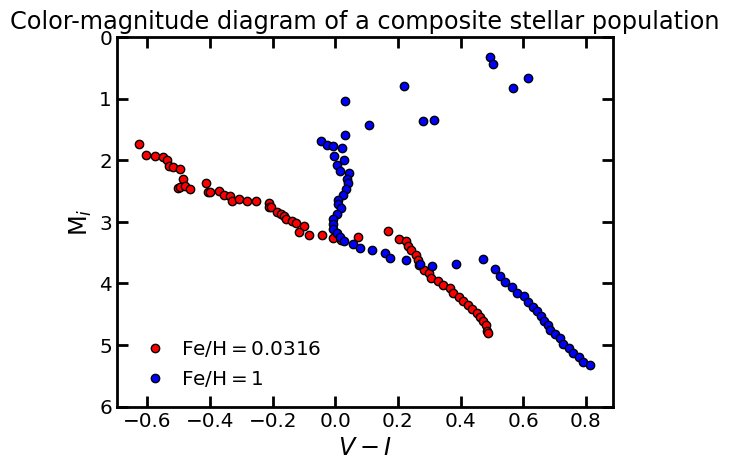

In [8]:
plt.plot(V[-1.5]-I[-1.5], I[-1.5], 'o', c='red', mec='k', label=r'Fe/H$=0.0316$')
plt.plot(V[0]-I[0], I[0], 'o', c='blue', mec='k', label=r'Fe/H$=1$')
plt.gca().invert_yaxis()

plt.ylim(6,0)
plt.title("Color-magnitude diagram of a composite stellar population")
plt.legend(loc='lower left')
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_i$');

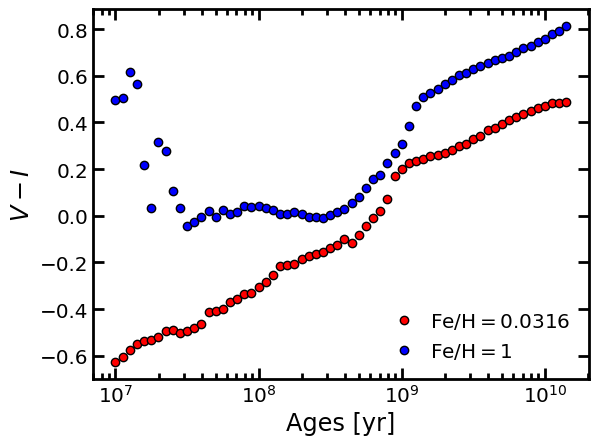

In [9]:
plt.plot(10**log_ages, V[-1.5]-I[-1.5], 'o', c='red', mec='k', label=r'Fe/H$=0.0316$')
plt.plot(10**log_ages, V[0]-I[0], 'o', c='blue', mec='k', label=r'Fe/H$=1$')
# plt.gca().invert_yaxis()
plt.xscale('log')

plt.legend(loc='lower right')
plt.xlabel(r'Ages [yr]')
plt.ylabel(r'$V-I$');

Now we get color-magnitude diagram with H and J filters.

In [10]:
print(artpop.filters.get_filter_names('LSST'))

['LSST_u', 'LSST_g', 'LSST_r', 'LSST_i', 'LSST_z', 'LSST_y']


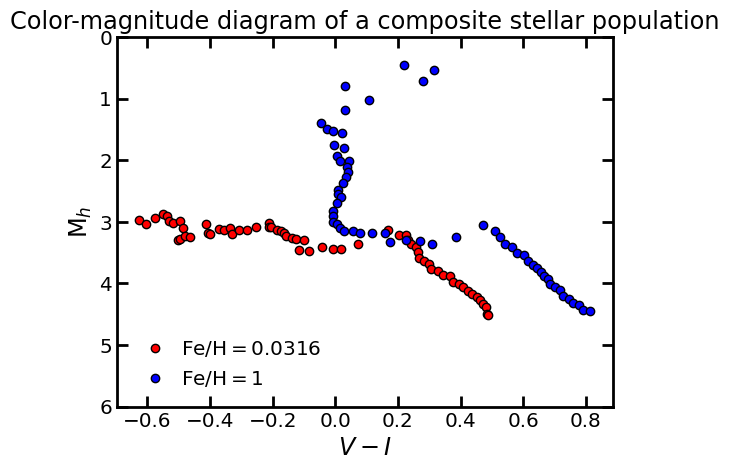

In [11]:
plt.plot(V[-1.5]-I[-1.5], H[-1.5], 'o', c='red', mec='k', label=r'Fe/H$=0.0316$')
plt.plot(V[0]-I[0], H[0], 'o', c='blue', mec='k', label=r'Fe/H$=1$')
plt.gca().invert_yaxis()

plt.ylim(6,0)
plt.title("Color-magnitude diagram of a composite stellar population")
plt.legend(loc='lower left')
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_h$');

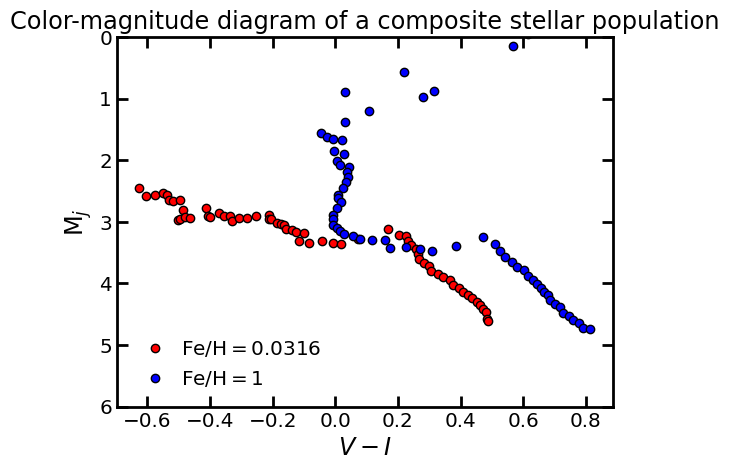

In [12]:
plt.plot(V[-1.5]-I[-1.5], J[-1.5], 'o', c='red', mec='k', label=r'Fe/H$=0.0316$')
plt.plot(V[0]-I[0], J[0], 'o', c='blue', mec='k', label=r'Fe/H$=1$')
plt.gca().invert_yaxis()

plt.ylim(6,0)
plt.title("Color-magnitude diagram of a composite stellar population")
plt.legend(loc='lower left')
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_j$');

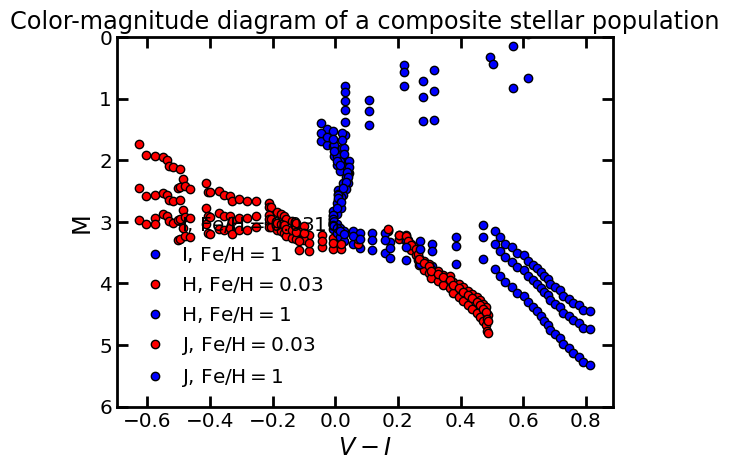

In [13]:
plt.plot(V[-1.5]-I[-1.5], I[-1.5], 'o', c='red', mec='k', label=r'I, Fe/H$=0.0316$')
plt.plot(V[0]-I[0], I[0], 'o', c='blue', mec='k', label=r'I, Fe/H$=1$')
plt.plot(V[-1.5]-I[-1.5], H[-1.5], 'o', c='red', mec='k', label=r'H, Fe/H$=0.03$')
plt.plot(V[0]-I[0], H[0], 'o', c='blue', mec='k', label=r'H, Fe/H$=1$')
plt.plot(V[-1.5]-I[-1.5], J[-1.5], 'o', c='red', mec='k', label=r'J, Fe/H$=0.03$')
plt.plot(V[0]-I[0], J[0], 'o', c='blue', mec='k', label=r'J, Fe/H$=1$')
plt.gca().invert_yaxis()

plt.ylim(6,0)
plt.title("Color-magnitude diagram of a composite stellar population")
plt.legend(loc='lower left')
plt.xlabel(r'$V-I$')
plt.ylabel(r'M');

We then use the age grid to make a large composite stellar population:

In [14]:
ssps = []

for feh in [-1, -0.75, -0.25, 0.0]:  # sampling with various metallicity
    print(f'[Fe/H] = {feh}')
    for age in log_ages:
        ssp = artpop.MISTSSP(
            log_age = age,       # log of age in years
            feh = feh,           # metallicity [Fe/H]
            phot_system = phot_system, # photometric system(s)
            num_stars = 5e5,      # number of stars
            random_state = rng,   # random state for reproducibility
        )
        ssps.append(ssp)
        csp = csp + ssp
    


[Fe/H] = -1
